<a href="https://colab.research.google.com/github/zrruziev/deep_learning_practice/blob/main/TENSORFLOW/cls_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Train and save a model to prepare y_pred

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples\n\n")

# # In case you don't use pretrained model
# tf.keras.backend.clear_session()
# model = keras.Sequential([
#         keras.Input(shape=input_shape),
#         layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Flatten(),
#         layers.Dropout(0.5),
#         layers.Dense(num_classes, activation="softmax")
#         ])

# model.summary()


# # Compile the model
# batch_size = 128
# epochs = 8
# model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


# # Train the model
# model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# tf.keras.models.save_model(model, "model_for_cm.h5")

# # Evaluation
# score = model.evaluate(x_test, y_test, verbose=0)
# print("\nTest loss:", score[0])
# print("Test accuracy:", score[1])

# pred = model(x_test)
# y_pred = np.argmax(pred, axis=-1)

4422102/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples




Shape:  (28, 28, 1)
Label:  9 -> Ankle boot


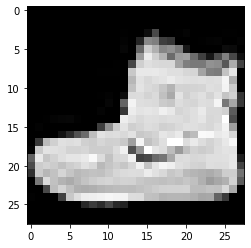

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Make sure labels and images are match
n = 0
print("Shape: ", x_train[n].shape)
print("Label: ", y_train[n], "->", class_names[y_train[n]])
plt.imshow(np.squeeze(x_train[n]), cmap='gray'); # matplotlib.pyplot.imshow() needs a 2D array, or a 3D array with the third dimension being of shape 3 or 4!

In [5]:
# Download the model
!wget -q --no-check-certificate 'https://drive.google.com/u/0/uc?id=1DeoF7rJLWuXFw_RVbwyT5UOEGHYlbEOK' -O model_for_cm.h5


pred_model = tf.keras.models.load_model("model_for_cm.h5")
pred = pred_model(x_test)
y_pred = np.argmax(pred, axis=-1)

<hr>
<br>

# confusion-matrix, accuracy, precision, recall, F1-score

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix,
                             multilabel_confusion_matrix,
                             ConfusionMatrixDisplay,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             classification_report)

- ### Confusion Matrix for Multi-Class Classification

  Confusion Matrix for multiclass classification is used to know     the performance of a Machine learning classification. It is       represented in a matrix form. Confusion Matrix gives a comparison between Actual and predicted values. The confusion matrix is a N x N matrix, where N is the number of classes or outputs. For 2 class ,we get 2 x 2 confusion matrix. For 3 class ,we get 3 X 3 confusion matrix.

In [7]:
# cm_multi = confusion_matrix(y_test, y_pred, normalize='true')
cm_multi = multilabel_confusion_matrix(y_test, y_pred)
cm_multi = np.flip(cm_multi, axis=1)
cm_multi = np.flip(cm_multi, axis=2)

print(cm_multi)

[[[ 768  232]
  [  93 8907]]

 [[ 975   25]
  [   8 8992]]

 [[ 796  204]
  [  99 8901]]

 [[ 924   76]
  [ 145 8855]]

 [[ 885  115]
  [ 249 8751]]

 [[ 976   24]
  [  22 8978]]

 [[ 693  307]
  [ 348 8652]]

 [[ 964   36]
  [  51 8949]]

 [[ 975   25]
  [  37 8963]]

 [[ 961   39]
  [  31 8969]]]


In [8]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))


Confusion Matrix

[[768   1  16  40   5   1 160   0   9   0]
 [  0 975   0  16   4   0   2   0   3   0]
 [  8   1 796  10  93   0  88   0   4   0]
 [  4   3   8 924  21   0  39   0   1   0]
 [  1   1  20  39 885   0  52   0   2   0]
 [  0   0   0   0   0 976   1  16   0   7]
 [ 80   1  53  34 123   0 693   0  16   0]
 [  0   0   0   0   0  11   0 964   1  24]
 [  0   1   2   6   3   3   6   4 975   0]
 [  0   0   0   0   0   7   0  31   1 961]]

Accuracy: 0.89

Micro Precision: 0.89
Micro Recall: 0.89
Micro F1-score: 0.89

Macro Precision: 0.89
Macro Recall: 0.89
Macro F1-score: 0.89

Weighted Precision: 0.89
Weighted Recall: 0.89
Weighted F1-score: 0.89


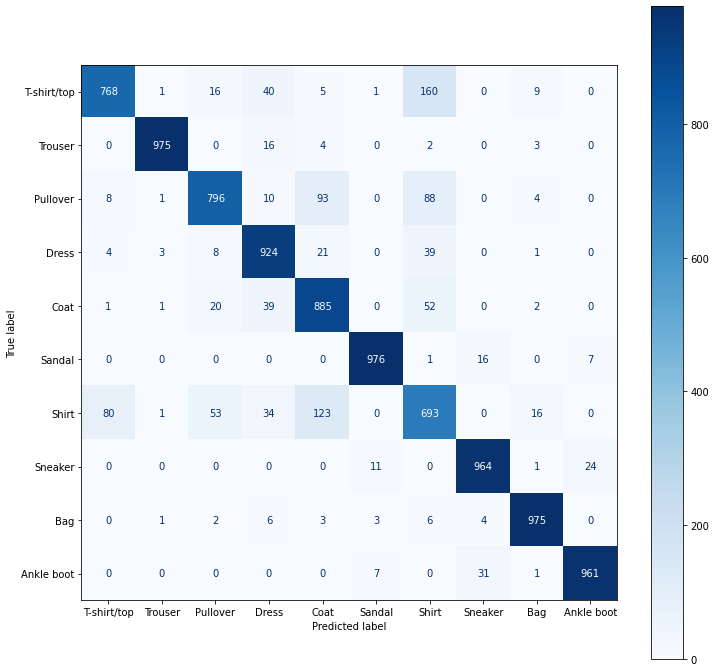

In [9]:
# cm = confusion_matrix(y_test, y_pred, normalize='true')
cm = confusion_matrix(y_test, y_pred)
# print(cm)


fig, ax = plt.subplots(figsize=(12,12))
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(ax=ax, cmap='Blues');
# plt.xlabel("true_labels")
# plt.ylabel("pred_labels")



In [10]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=class_names))



Classification Report

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.77      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.89      0.80      0.84      1000
       Dress       0.86      0.92      0.89      1000
        Coat       0.78      0.89      0.83      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.67      0.69      0.68      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## Accuracy

Accuracy is a metric that generally describes how the model performs across all classes. It is useful when all classes are of equal importance. It is calculated as the ratio between the number of correct predictions to the total number of predictions.

- $Accuracy = \dfrac{TP+TN}{TP + TN + FP + FN}$
  
  In brief, **accuracy** is sum of diagonal values of confusion matrix devided by sum of all values of confusion matrix

## Precision

- The precision is calculated as the ratio between the number of     Positive samples correctly classified to the total number of       samples classified as Positive (either correctly or               incorrectly). The precision measures the model's accuracy in       classifying a sample as positive.

  - $Recall = \dfrac{TP}{TP + FP}$
  
    For example, model predicted 887 samples out of 1000 samples as `T-shirt/top` corrrectly, and 217 samples of (trouser, pullover, dress, coat, shirt, bag) predicted as `T-shirt/top` incorrectly. So recall value for this class:
    
    $Recall = \dfrac{887}{887+1+16+20+1+0+176+0+3+0} = 0.8034$ -->.08
  
  
- When the model makes many incorrect Positive classifications, or   few correct Positive classifications, this increases the           denominator and makes the precision small. On the other hand,     the precision is high when:

  1. The model makes many correct Positive classifications              (maximize True Positive).
  2. The model makes fewer incorrect Positive classifications          (minimize False Positive).

- Imagine a man who is trusted by others; when he predicts           something, others believe him. The precision is like this man.     When the precision is high, you can trust the model when it       predicts a sample as Positive. Thus, the precision helps to know   how the model is accurate when it says that a sample is           Positive. Based on the previous discussion, here is a definition of precision:
  <br>**The precision reflects how reliable the model is in classifying samples as Positive.**

## Recall

The recall is calculated as the ratio between the number of Positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect Positive samples. The higher the recall, the more positive samples detected.

- $Recall = \dfrac{TP}{TP + FN}$

  For example, model predicted 887 samples out of 1000 samples as   `T-shirt/top` corrrectly, and 113 samples as `pullover`,           `dress`, `coat`, `sandal`, `shirt`, `bag` incorrectly. So recall   value for this class:
  
  $Recall = \dfrac{887}{887+0+20+18+7+1+59+0+8+0} = 0.887$ -->       0.89

The recall cares only about how the positive samples are classified. This is independent of how the negative samples are classified, e.g. for the precision. When the model classifies all the positive samples as Positive, then the recall will be 100% even if all the negative samples were incorrectly classified as Positive.


## F1 Score

- F1-score is the harmonic mean of precision and recall. It combines precision and recall into a single number using the following formula:
  
  $Recall = \dfrac{2}{ {\dfrac{1}{Precision}} + {\dfrac{1}{Recall}} } = \dfrac{2*Precision*Recall}{Precision + Recall}$
  
  F1-score takes both precision and recall into account, which also means it accounts for both FPs and FNs. The higher the precision and recall, the higher the F1-score. F1-score ranges between 0 and 1. The closer it is to 1, the better the model. 
  
  If all classes have the same number of samples, I would consider Macro-average F1-score as the best metric to evaluate the performance of a multiclass classification model. This is because it gives equal weight to all classes, and it provides a good balance between precision and recall. This metric is a good overall measure of the model's performance and does not favor any specific class over the others. It gives a good understanding of the model's performance across all classes and a good idea of where the model is performing well or poorly.


<hr>

## ["Beyond Accuracy" by by Will Koehrsen](https://willkoehrsen.github.io/statistics/learning/beyond-accuracy-precision-and-recall/)

<hr>